## Adult Data Set
### Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

Dataset Characeteristics: Multivariate <br>
Attribute Characteristics: Categorical, Integer <br>
Number of Instances: 48842 <br>
Number of Attributes: 14 <br>
Missing Values: Yes <br>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics as m
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import pandas as pd
import itertools

header = ["age","workclass","fnlwgt","education","education-num",
          "marital-status","occupation","relationship","race", "sex",
         "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
adults_raw = pd.read_csv("./Adult/adult.data", names=header)




In [3]:
print(adults_raw.head(n=10))

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   
8   31            Private   45781     Masters             14   
9   42            Private  159449   Bachelors             13   

           marital-status          occupation    relationship    race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3  

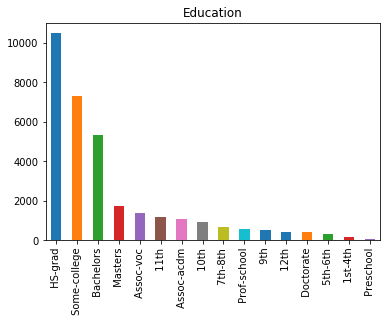

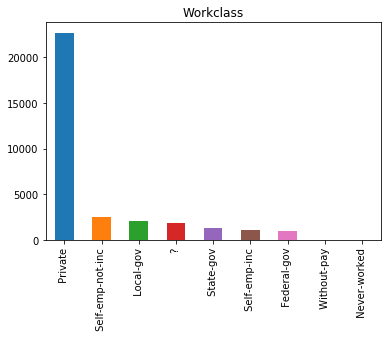

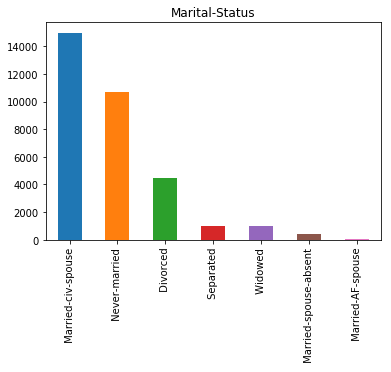

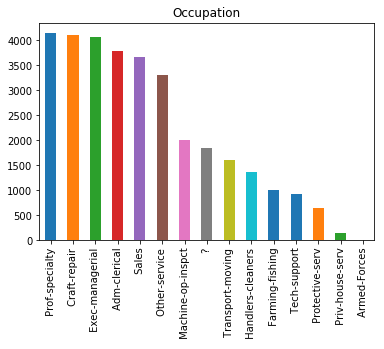

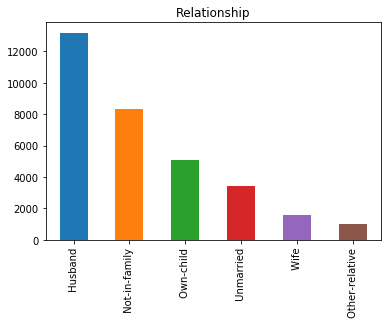

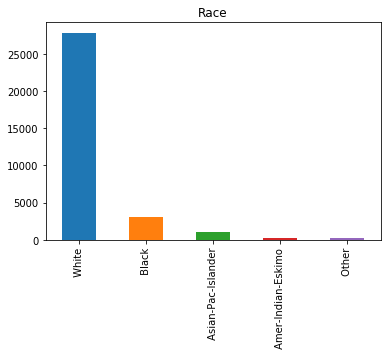

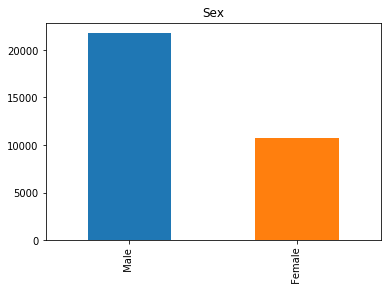

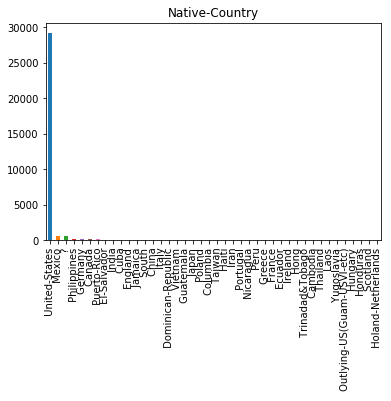

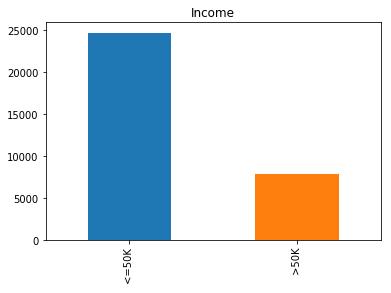

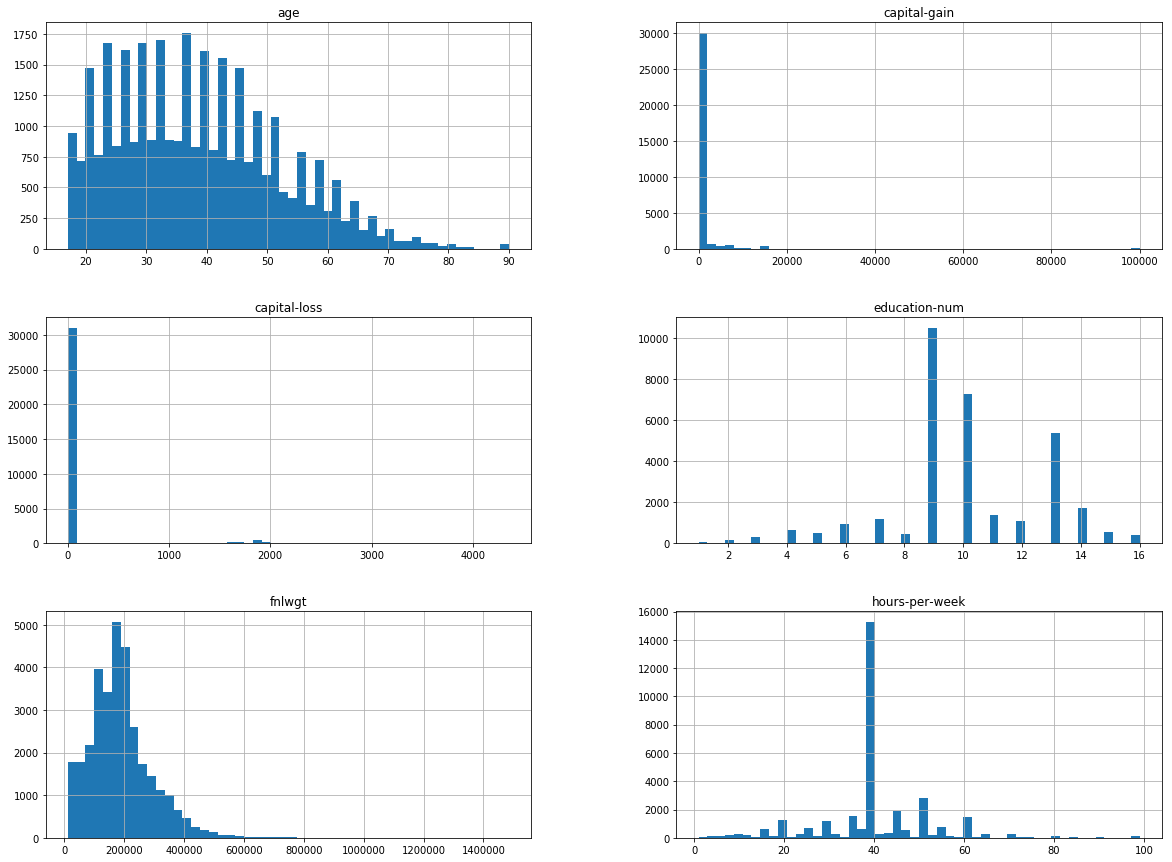

In [4]:
adults_raw['education'].value_counts().plot(title = 'Education', kind='bar')
plt.show()
adults_raw['workclass'].value_counts().plot(title = 'Workclass', kind='bar')
plt.show()
adults_raw['marital-status'].value_counts().plot(title = 'Marital-Status', kind='bar')
plt.show()
adults_raw['occupation'].value_counts().plot(title = 'Occupation', kind='bar')
plt.show()
adults_raw['relationship'].value_counts().plot(title = 'Relationship', kind='bar')
plt.show()
adults_raw['race'].value_counts().plot(title = 'Race', kind='bar')
plt.show()
adults_raw['sex'].value_counts().plot(title = 'Sex', kind='bar')
plt.show()
adults_raw['native-country'].value_counts().plot(title = 'Native-Country', kind='bar')
plt.show()
adults_raw['income'].value_counts().plot(title = 'Income', kind='bar')
plt.show()
adults_raw.hist(bins = 50, figsize = (20,15))
plt.show()

In [5]:
# make all values to integers
enc = preprocessing.OrdinalEncoder(categories="auto", dtype=int)
enc.fit(adults_raw)
adults = enc.transform(adults_raw)

# split X and y
adults_input = adults[:,0:14]
adults_input
adults_target = adults[:,14]
adults_target

array([0, 0, 0, ..., 0, 0, 1])

In [6]:
adults_test_raw = pd.read_csv("./Adult/adult.test", names=header)
adults_test_raw
enc_test = preprocessing.OrdinalEncoder(categories="auto", dtype=int)
enc_test.fit(adults_test_raw)
adults_test = enc_test.transform(adults_test_raw)
adults_target_test = adults_test[:,14]
adults_input_test = adults_test[:,0:14]

In [5]:
def plot_confusion_matrix(cm,classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [8]:
def plot_results(cnf_matrix, adults_target_test, prediction, title='Confusion matrix'):
    class_names = ["Payment <= 50K","Payment > 50K",]
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, title=title)
    plt.show()
    print(" Accuracy:\t %.3f" % m.accuracy_score(adults_target_test, prediction))
    print(" Precision:\t %.3f" % m.precision_score(adults_target_test, prediction))
    print(" Sensitivity:\t %.3f" % m.recall_score(adults_target_test, prediction))
    print(" F1:\t\t %.3f" % m.f1_score(adults_target_test, prediction))

In [9]:
def get_pd_overview(cv_results):
    pd_results = pd.DataFrame(grid_search.cv_results_)
    params = pd_results.loc[:,"params"]
    mean_test_scores = pd_results.loc[:,"mean_test_score"]
    frames = [mean_test_scores, params]
    overview = pd.concat(frames,  axis=1)
    return overview

In [10]:
from sklearn import tree

## DECISION TREE

param_grid = [
  {'max_depth': [1, 5, 10, 50], 'criterion': ["gini"]},
  {'max_depth': [1, 5, 10, 50], 'criterion': ["entropy"]},
 ]

clf = tree.DecisionTreeClassifier()

grid_search = GridSearchCV(clf, param_grid, cv = 5, iid=False, return_train_score=True)

grid_search.fit(adults_input, adults_target) 
cv_results = grid_search.cv_results_
overview = get_pd_overview(cv_results)

In [11]:
print(overview)
print("\nBest parameters: ", grid_search.best_params_)

   mean_test_score                                     params
0         0.759190      {'criterion': 'gini', 'max_depth': 1}
1         0.848991      {'criterion': 'gini', 'max_depth': 5}
2         0.852984     {'criterion': 'gini', 'max_depth': 10}
3         0.808268     {'criterion': 'gini', 'max_depth': 50}
4         0.759190   {'criterion': 'entropy', 'max_depth': 1}
5         0.846442   {'criterion': 'entropy', 'max_depth': 5}
6         0.852093  {'criterion': 'entropy', 'max_depth': 10}
7         0.813734  {'criterion': 'entropy', 'max_depth': 50}

Best parameters:  {'criterion': 'gini', 'max_depth': 10}


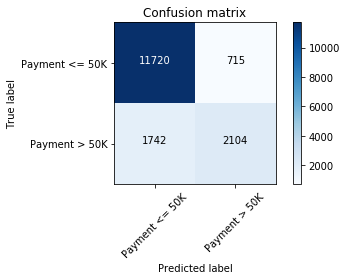

 Accuracy:	 0.849
 Precision:	 0.746
 Sensitivity:	 0.547
 F1:		 0.631


In [12]:
# use best parameters for model
clf = grid_search.best_estimator_

prediction = clf.predict(adults_input_test)
cnf_matrix = m.confusion_matrix(adults_target_test, prediction)

plot_results(cnf_matrix, adults_target_test, prediction)

In [13]:
from sklearn.ensemble import RandomForestClassifier

##RANDOM FOREST    
rand_forest = RandomForestClassifier()
param_grid = [
  {'n_estimators':[20,100,200],'max_depth': [1, 5, 10, 50], 'criterion': ["gini"]},
  {'n_estimators':[20,100,200],'max_depth': [1, 5, 10, 50], 'criterion': ["entropy"]},
 ]

grid_search = GridSearchCV(rand_forest, param_grid, cv = 5, iid=False, return_train_score=True)

grid_search.fit(adults_input, adults_target) 
cv_results = grid_search.cv_results_
overview = get_pd_overview(cv_results)

In [14]:
print(overview)
print("\nBest parameters: ", grid_search.best_params_)

    mean_test_score                                             params
0          0.764074  {'criterion': 'gini', 'max_depth': 1, 'n_estim...
1          0.766224  {'criterion': 'gini', 'max_depth': 1, 'n_estim...
2          0.761432  {'criterion': 'gini', 'max_depth': 1, 'n_estim...
3          0.848408  {'criterion': 'gini', 'max_depth': 5, 'n_estim...
4          0.849698  {'criterion': 'gini', 'max_depth': 5, 'n_estim...
5          0.850435  {'criterion': 'gini', 'max_depth': 5, 'n_estim...
6          0.858113  {'criterion': 'gini', 'max_depth': 10, 'n_esti...
7          0.858604  {'criterion': 'gini', 'max_depth': 10, 'n_esti...
8          0.858358  {'criterion': 'gini', 'max_depth': 10, 'n_esti...
9          0.851172  {'criterion': 'gini', 'max_depth': 50, 'n_esti...
10         0.857068  {'criterion': 'gini', 'max_depth': 50, 'n_esti...
11         0.856976  {'criterion': 'gini', 'max_depth': 50, 'n_esti...
12         0.766807  {'criterion': 'entropy', 'max_depth': 1, 'n_es...
13    

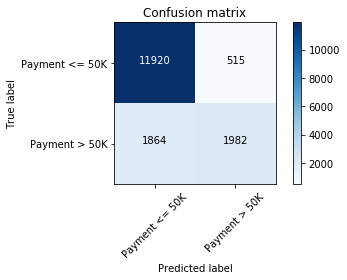

 Accuracy:	 0.854
 Precision:	 0.794
 Sensitivity:	 0.515
 F1:		 0.625


In [15]:
# use best parameters for model
rand_forest = grid_search.best_estimator_

prediction = rand_forest.predict(adults_input_test)
cnf_matrix = m.confusion_matrix(adults_target_test, prediction)

plot_results(cnf_matrix, adults_target_test, prediction)

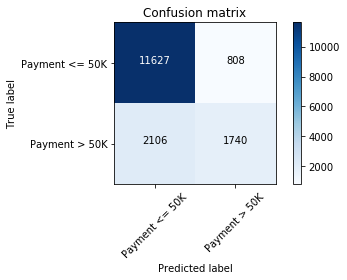

 Accuracy:	 0.821
 Precision:	 0.683
 Sensitivity:	 0.452
 F1:		 0.544


In [16]:
from sklearn.naive_bayes import GaussianNB

##GAUSSIAN NAIVE BAYES

gnb = GaussianNB()
gnb.fit(adults_input,adults_target)

prediction = gnb.predict(adults_input_test)
cnf_matrix = m.confusion_matrix(adults_target_test, prediction)

plot_results(cnf_matrix, adults_target_test, prediction)

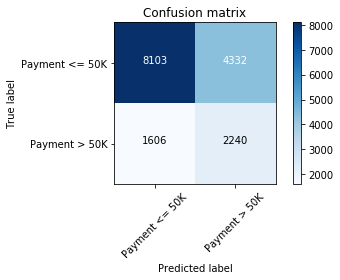

 Accuracy:	 0.635
 Precision:	 0.341
 Sensitivity:	 0.582
 F1:		 0.430


In [17]:
from sklearn.naive_bayes import MultinomialNB

## MULTINOMIAL NAIVE BAYES

gnb = MultinomialNB()
gnb.fit(adults_input,adults_target)

prediction = gnb.predict(adults_input_test)
cnf_matrix = m.confusion_matrix(adults_target_test, prediction)

plot_results(cnf_matrix, adults_target_test, prediction)

In [ ]:
from sklearn.svm import SVC
## SUPPORT VECTOR MACHINE

svcl = SVC();
param_grid = [
  {'gamma': [0.1, 1.0],'C': [1, 10], 'kernel': ["rbf"]}
 ]

grid_search = GridSearchCV(svcl, param_grid, cv = 5, iid=False, return_train_score=True)

grid_search.fit(adults_input, adults_target) 
cv_results = grid_search.cv_results_
overview = get_pd_overview(cv_results)

In [2]:
print(overview)
print("\nBest parameters: ", grid_search.best_params_)

NameError: name 'overview' is not defined

In [ ]:
# use best parameters for model
svcl = grid_search.best_estimator_

prediction = svcl.predict(adults_input_test)
cnf_matrix = m.confusion_matrix(adults_target_test, prediction)

plot_results(cnf_matrix, adults_target_test, prediction)